# HW1_2:Multiple liner regression example (stock)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# step1: 讀取資料

In [2]:
df=pd.read_csv('2330.csv',index_col='Date',parse_dates=True)
type(df)

pandas.core.frame.DataFrame

In [3]:
print(df.info())
len(df)
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-02-18 to 2019-02-27
Data columns (total 6 columns):
Open         8 non-null float64
High         8 non-null float64
Low          8 non-null float64
Close        8 non-null float64
Adj Close    8 non-null float64
Volume       8 non-null int64
dtypes: float64(5), int64(1)
memory usage: 448.0 bytes
None
             Open        High         Low      Close  Adj Close         Volume
count    8.000000    8.000000    8.000000    8.00000    8.00000       8.000000
mean   185.375000  189.500000  183.000000  187.00000  187.00000  241587.500000
std      5.343554    5.830952    4.720775    6.23355    6.23355   81485.711938
min    178.000000  182.000000  178.000000  178.00000  178.00000  137400.000000
25%    182.000000  184.750000  180.250000  182.00000  182.00000  171400.000000
50%    183.500000  189.000000  181.000000  187.00000  187.00000  243850.000000
75%    190.250000  194.250000  186.750000  191.50000  191.50000  314425.0000

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-18,182.0,182.0,178.0,178.0,178.0,150100
2019-02-19,178.0,187.0,178.0,185.0,185.0,219400
2019-02-20,185.0,185.0,181.0,182.0,182.0,137400
2019-02-21,182.0,184.0,181.0,182.0,182.0,178500
2019-02-22,182.0,191.0,181.0,189.0,189.0,334600


In [4]:
df=df[['Open','High','Low','Close','Volume']]
#df['HL_PCT']=(df['High']-df['Low'])/df['Close']*100.0
#df['PCT_change']=(df['Close']-df['Open'])/df['Open']*100.0
#df=df[['Close','HL_PCT','PCT_change','Volume']]
print(df.head())

#x=df[['Open','High','Low','Close','Adj Close']]
#y=df['Volume']

# 前處理

# 對空數據進行處理，並對Close的股票Value進行預測


In [5]:
forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)#不創建新格，直接在原格上修改
#預測forecast_out天後的
forecast_out = int(math.ceil(0.01 * len(df)))


# step2 : fature engineering(data preprocessing-data,outline,normalization,find efficient feature, split training and value )

In [6]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.shape)
print(df.tail())
X = np.array(df.drop(['label'], 1))#刪除label 列
X = preprocessing.scale(X) #將數據標準化
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
print(X)
print(X_lately)
y = np.array(df['label'])
#print(y)
print(X.shape)
print(y.shape)

(8, 6)
             Open   High    Low  Close  Volume  label
Date                                                 
2019-02-21  182.0  184.0  181.0  182.0  178500  189.0
2019-02-22  182.0  191.0  181.0  189.0  334600  193.0
2019-02-25  190.0  194.0  186.0  193.0  307700  191.0
2019-02-26  193.0  195.0  189.0  191.0  336700  196.0
2019-02-27  191.0  198.0  190.0  196.0  268300    NaN
[[-0.67521104 -1.37504775 -1.13227703 -1.54348727 -1.20026259]
 [-1.47546115 -0.45834925 -1.13227703 -0.34299717 -0.29108705]
 [-0.07502345 -0.82502865 -0.45291081 -0.85749293 -1.36687917]
 [-0.67521104 -1.00836835 -0.45291081 -0.85749293 -0.82767117]
 [-0.67521104  0.27500955 -0.45291081  0.34299717  1.2202697 ]
 [ 0.9252892   0.82502865  0.67936622  1.02899151  0.8673574 ]
 [ 1.52547679  1.00836835  1.35873244  0.68599434  1.24782047]]
[[1.12535173 1.55838744 1.58518785 1.54348727 0.3504524 ]]
(7, 5)
(7,)


            Open      High       Low     Close    Volume     label
Open    1.000000  0.720028  0.953491  0.630970  0.519353  0.658476
High    0.720028  1.000000  0.842217  0.979481  0.932828  0.757066
Low     0.953491  0.842217  1.000000  0.776404  0.682854  0.776404
Close   0.630970  0.979481  0.776404  1.000000  0.919833  0.705414
Volume  0.519353  0.932828  0.682854  0.919833  1.000000  0.838997
label   0.658476  0.757066  0.776404  0.705414  0.838997  1.000000


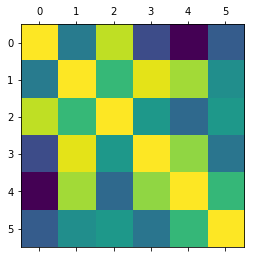

In [7]:
#資料的相關性
print(df.corr())
plt.matshow(df.corr())
plt.show()

# step3: build prediction model

In [8]:

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)

print(accuracy)
print(model.intercept_)
print(model.coef_)

0.6786753223007335
188.57658333685208
[-0.64114696 -7.85078521  8.76274853 -4.65023312  9.59895051]


# step4: 預測結果

In [9]:
#預測test set
y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))
print(y_pred,accuracy,forecast_out)

[200.37600928 185.53915286]
<class 'numpy.ndarray'>
[200.37600928 185.53915286] 0.6786753223007335 1


In [10]:
print(type(y_pred),type(y_test))
print(len(y_pred),len(y_test))
print(y_pred.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2 2
(2,) (2,)


In [11]:
#計算test set 的RMSE
from sklearn import metrics
print ("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE:  3.117702920485339


# 預測值與誤差值的關係圖

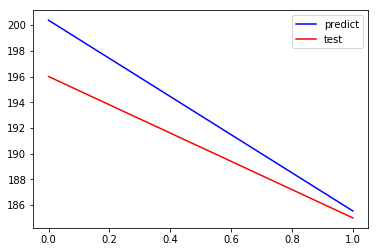

In [12]:
plt.figure()

plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") 

plt.show()

# 預測未來的股票趨勢

2019-02-26 00:00:00 1551139200.0
                      Open   High    Low  Close    Volume  label    Forecast
Date                                                                        
2019-02-22 00:00:00  182.0  191.0  181.0  189.0  334600.0  193.0         NaN
2019-02-25 00:00:00  190.0  194.0  186.0  193.0  307700.0  191.0         NaN
2019-02-26 00:00:00  193.0  195.0  189.0  191.0  336700.0  196.0         NaN
2019-02-27 08:00:00    NaN    NaN    NaN    NaN       NaN    NaN  200.376009
2019-02-28 08:00:00    NaN    NaN    NaN    NaN       NaN    NaN  185.539153


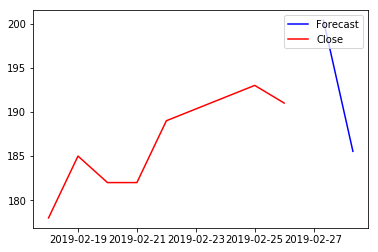

In [13]:
df['Forecast']=np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
print(last_date,last_unix)
one_day = 86400
next_unix = last_unix + one_day

for i in y_pred:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())

plt.figure()

plt.plot(df['Forecast'],'b',label="Forecast")
plt.plot(df['Close'],'r',label="Close")
plt.legend(loc="upper right") 

plt.show()

#df['Close'].plot()
#df['Forecast'].plot()
#plt.show()